In [1]:
!pip install patool

In [2]:
!conda activate env_name
!pip install ipykernel --user
!python -m ipykernel install --user --name env_name --display-name env_name


EnvironmentNameNotFound: Could not find conda environment: env_name
You can list all discoverable environments with `conda info --envs`.





Installed kernelspec env_name in C:\Users\ASUS\AppData\Roaming\jupyter\kernels\env_name


In [3]:
!pip install shutil

ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil


In [4]:
!pip install opencv-python

In [5]:
import pandas as pd
import random
import shutil
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import sklearn as skl
import plotly.graph_objects as go
import statsmodels.api as sm
import statsmodels.formula.api as smf
import torch
import torch.nn as nn
import sklearn as skl
import torchvision 
import torchvision.transforms as transforms
import zipfile
import gzip
import torch.optim as optim
import torch.nn.functional as F
import matplotlib
import os
import cv2
import patoolib
import requests
import copy
import torch.optim as optim
import sklearn
try:
  import transformers # Huggingface’s transformers library
except:
  !pip install transformers
  import transformers

from collections import Counter
from bs4 import BeautifulSoup
from torchvision import models
from skimage.transform import resize
from google_images_search import GoogleImagesSearch
from skimage.io import imread
from pandas.core.common import random_state
from sklearn.utils import resample
from sklearn.datasets import make_classification
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from transformers import AutoModel, AutoTokenizer , BertTokenizerFast
from transformers import AdamW
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.svm import SVC
from PIL import Image
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (25.0, 7.0)

In [6]:
os.makedirs("D:\IdeaProjects\dataset", exist_ok=True)

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
patoolib.extract_archive("dataset.zip", outdir='D:\IdeaProjects\dataset')

patool: Extracting dataset.zip ...
patool: ... dataset.zip extracted to `D:\IdeaProjects\dataset'.


'D:\\IdeaProjects\\dataset'

In [7]:
# зададим какие преобразования необходимо сделать с каждым изображением
transform = transforms.Compose(
    [transforms.Resize((224,224)),  #изменим размер изображений
     transforms.ToTensor(),   #переведем в формат который необходим нейронной сети - тензор
     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])]) # проведем нормализацию изображения


In [8]:
df = pd.read_csv('D:\IdeaProjects\dataset/train.csv')

In [14]:
for class_name in df.Class.unique():
    os.mkdir(os.path.join('D:\IdeaProjects\dataset/dataset', str(class_name)))

In [15]:
# Словарь с соответствием фотографий и классов
images_dict = pd.read_csv('D:\IdeaProjects\dataset/train.csv').set_index('image')['Class'].to_dict()

In [17]:
# Рассортировываем фотографии по классам
for filename in os.listdir('D:\IdeaProjects\dataset/dataset'):
    if filename.endswith('.jpg'):
        class_name = images_dict[filename]
        destination_folder = os.path.join('D:\IdeaProjects\dataset/dataset', str(class_name))
        shutil.move(os.path.join('D:\IdeaProjects\dataset/dataset', filename), destination_folder)

In [61]:
for folder in os.listdir('D:\IdeaProjects\dataset/dataset'):
    folder = 'D:/IdeaProjects/dataset/dataset/' + folder
    #print(type(folder), folder,'\n',a)
    for file in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, file))
        brightness_contrast = cv2.convertScaleAbs(img, alpha=1.5, beta=50) # увеличиваем яркость на 50 и контраст на 1.5
        cv2.imwrite(os.path.join(folder, file.replace(".jpg", "_brightness_contrast.jpg")), brightness_contrast) # сохраняем новое изображение

In [60]:
for folder in os.listdir('D:\IdeaProjects\dataset/dataset'):
    folder = 'D:/IdeaProjects/dataset/dataset/' + folder
    for file in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, file))
        rotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE) # поворачиваем на 90 градусов по часовой стрелке
        cv2.imwrite(os.path.join(folder, file.replace(".jpg", "_rotated.jpg")), rotated) # сохраняем новое изображение


In [9]:
#функция для вывода изображений
def image_shower(images, labels, n=6):
    plt.figure(figsize=(12, 12))
    for i, image in enumerate(images[:n]):
        plt.subplot(n, n, i + 1)
        image = image/ 2 + 0.5
        plt.imshow(image.numpy().transpose((1, 2, 0)).squeeze())
    print("Real Labels: ", ' '.join('%5s' % classes[label] for label in labels[:n]))
#имена классов
classes = df.Class.unique()

#путь до датасета
PATH = "D:/IdeaProjects/dataset/dataset/"

In [10]:
#загружаем тренировочный и тестовый датасеты
trainset = torchvision.datasets.ImageFolder(os.path.join(PATH), transform=transform)
dataloader = torch.utils.data.DataLoader(trainset, batch_size=32, num_workers=0, shuffle=True) #DataLoader будет загружать наше изображение по батчам

Real Labels:     48    37    65    24   101    48


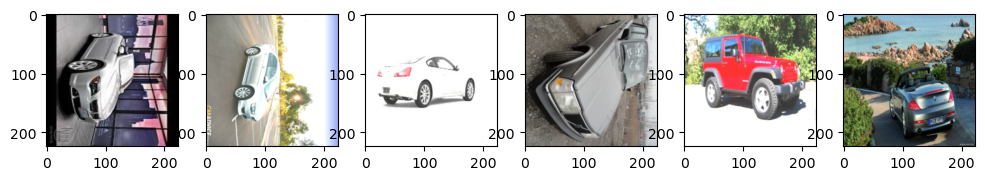

In [11]:
#Проверим как работает наш загрузчик и посмотрим на парочку изображений
images, labels = next(iter(dataloader))
image_shower(images, labels)

In [12]:
#model1 = models.mobilenet_v3_small(pretrained=True)
#model1 = models.vgg19(pretrained=True)
model1 = models.mobilenet_v3_large(pretrained=True)
#model1 = torch.hub.load('pytorch/vision:v0.10.0', 'googlenet', pretrained=True)

D:\Anaconda\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\Anaconda\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [13]:
class My_Net(nn.Module): # наследуемся от класса nn.Module
# Инициализация модели
    def __init__(self):
        super().__init__()

        self.model = model1

        self.act = nn.ReLU()    

        self.linear0 = nn.Linear(1000,500)
        self.linear1 = nn.Linear(500,196)        

    def forward(self, x):

        fea = self.model(x)
        fea = self.act(fea)
        fea = self.linear0(fea)
        fea = self.act(fea)
        fea = self.linear1(fea)

        return fea

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [15]:
model = My_Net()
model = model.to(device)
print(model) # посмотрим на нашу модель

My_Net(
  (model): MobileNetV3(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
            (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (1): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          )
        )
      )
      (2): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
    

In [16]:
#Критерии полезны для обучения нейронной сети. Учитывая входные данные и цель, они вычисляют градиент в соответствии с заданной функцией потерь
criterion = nn.CrossEntropyLoss()
#criterion = nn.L1Loss()
#torch.optim - это пакет, реализующий различные алгоритмы оптимизации. Наиболее часто используемые методы уже поддерживаются, а интерфейс достаточно общий, так что более сложные методы могут быть также легко интегрированы в будущем.
optimizer = optim.AdamW(model.parameters(), lr=0.0001)

In [17]:
model = model.to(device)
criterion = criterion.to(device)

In [18]:
torch.cuda.is_available()

True

In [19]:
loss_sum = []
epochs = 4
for epoch in range(epochs):  # многократное прохождение по набору данных

    running_loss = 0.0
    for i, data in enumerate(dataloader, 0):
        # получаем входные данные; данные - это список [inputs, labels].
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # обнуляем градиенты параметров
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss_sum.append(loss.item())
        loss.backward()
        optimizer.step()

        # вывести статистику обучения
        running_loss += loss.item() 
        if i % 10 == 0:    # вывести каждые 200 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 10:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,     1] loss: 0.538
[1,    11] loss: 5.314
[1,    21] loss: 5.291
[1,    31] loss: 5.297
[1,    41] loss: 5.291
[1,    51] loss: 5.271
[1,    61] loss: 5.210
[1,    71] loss: 5.224
[1,    81] loss: 5.212
[1,    91] loss: 5.235
[1,   101] loss: 5.208
[1,   111] loss: 5.171
[1,   121] loss: 5.150
[1,   131] loss: 5.096
[1,   141] loss: 5.137
[1,   151] loss: 5.053
[1,   161] loss: 5.020
[1,   171] loss: 5.030
[1,   181] loss: 4.989
[1,   191] loss: 4.956
[1,   201] loss: 4.868
[1,   211] loss: 4.846
[1,   221] loss: 4.746
[1,   231] loss: 4.731
[1,   241] loss: 4.708
[1,   251] loss: 4.643
[1,   261] loss: 4.497
[1,   271] loss: 4.498
[1,   281] loss: 4.367
[1,   291] loss: 4.476
[1,   301] loss: 4.316
[1,   311] loss: 4.366
[1,   321] loss: 4.221
[1,   331] loss: 4.190
[1,   341] loss: 4.082
[1,   351] loss: 4.093
[1,   361] loss: 4.026
[1,   371] loss: 3.998
[1,   381] loss: 3.860
[1,   391] loss: 3.864
[1,   401] loss: 3.776
[1,   411] loss: 3.762
[1,   421] loss: 3.907
[1,   431] 

[4,   781] loss: 0.186
[4,   791] loss: 0.222
[4,   801] loss: 0.186
[4,   811] loss: 0.176
[4,   821] loss: 0.194
[4,   831] loss: 0.165
[4,   841] loss: 0.178
[4,   851] loss: 0.198
[4,   861] loss: 0.200
[4,   871] loss: 0.187
[4,   881] loss: 0.232
[4,   891] loss: 0.216
[4,   901] loss: 0.182
[4,   911] loss: 0.183
[4,   921] loss: 0.217
Finished Training


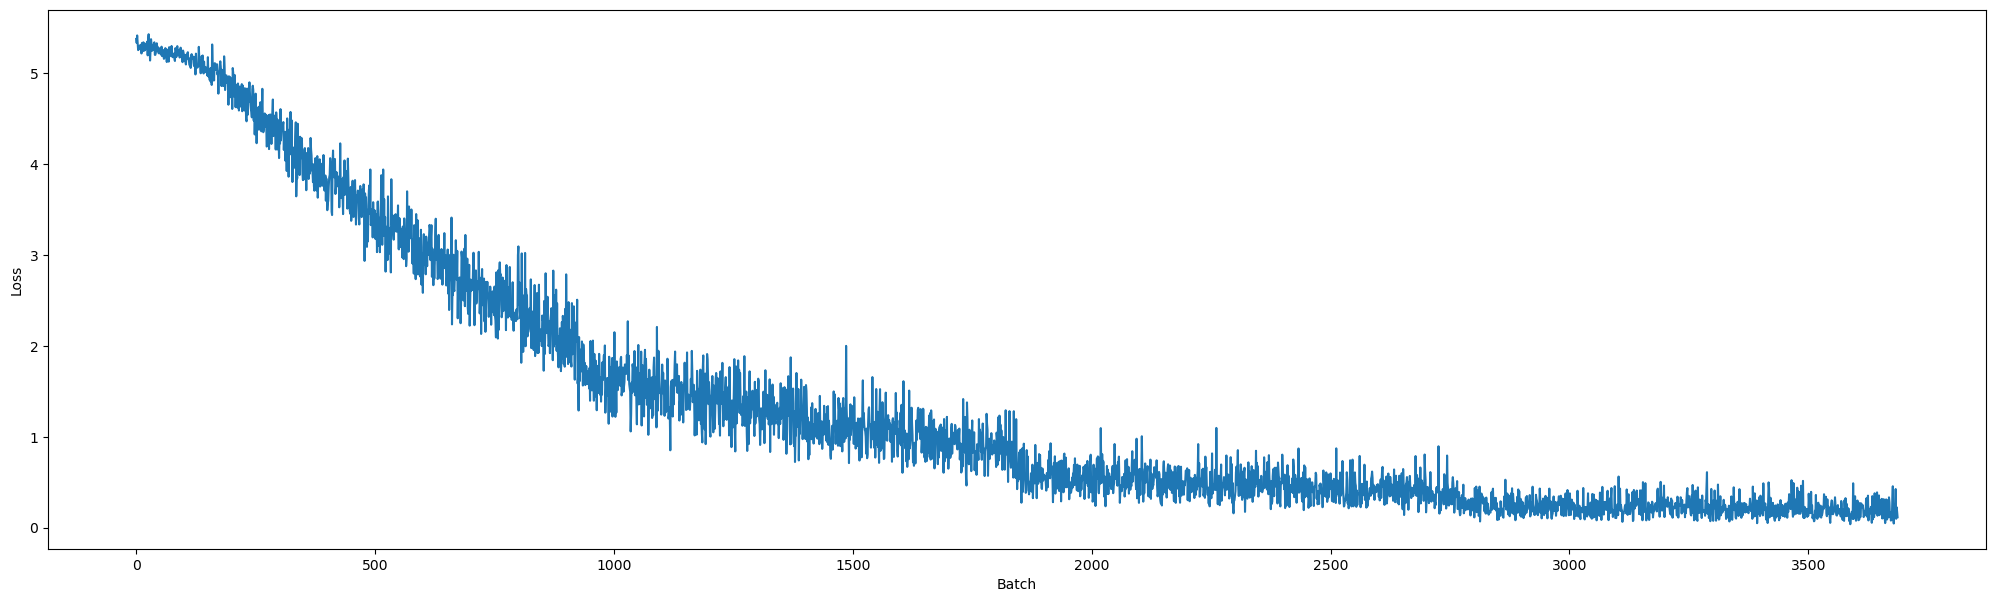

In [20]:
plt.plot(loss_sum)
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.show()


In [ ]:
correct = 0
total = 0
# поскольку мы не обучаемся, нам не нужно вычислять градиенты для наших выходов
with torch.no_grad():
    for data in dataloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        # рассчитываем выходные данные, пропуская изображения через сеть
        outputs = model(images)
        # класс с наибольшей мощностью - это то, что мы выбираем в качестве предсказания
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network test images: {100 * correct // total} %')

In [ ]:
# Подготовка
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in dataloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)        
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        # собираем правильные прогнозы для каждого класса
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# Выводим точность на каждом классе
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:.1f} is {accuracy:.1f} %')

In [21]:
traced_model = torch.jit.trace(model.to(device), torch.randn(1, 3, 224, 224).to(device))
traced_model.save(os.path.join('D:\Model', "mobile_large_model_v6.pt"))

D:\Anaconda\lib\site-packages\torch\jit\_trace.py:1001: TracerWarning: Output nr 1. of the traced function does not match the corresponding output of the Python function. Detailed error:
Tensor-likes are not close!

Mismatched elements: 196 / 196 (100.0%)
Greatest absolute difference: 2.3247718811035156 at index (0, 170) (up to 1e-05 allowed)
Greatest relative difference: 0.08288455496343858 at index (0, 177) (up to 1e-05 allowed)
  _check_trace(
